### 학습목표 
#### 머신러닝 알고리즘에 주입할 데이터를 준비하는 방법을 배움
#### 데이터 형태가 알고리즘에 미치는 영향을 이해

# 02-1 훈련 세트와 테스트 세트
#### 지도학습, 비지도학습 차이를 확인하고 모델 훈련시키는 훈련 세트와 평가를 위한 테스트 세트로 데이터를 나눠 학습

## 지도 학습과 비지도 학습
##### 지도학습 : 알고리즘이 정답을 맞히는 것을 학습 (입력(데이터), 정답(타깃), 훈련 데이터(입력+정답), 피쳐(앞서 언급한 길이와 무게))

##### 비지도학습 : 타깃 데이터가 없어서 입력 데이터에서 어떤 특징을 찾는데 주로 활용

## 훈련 세트와 테스트 세트
##### 훈련 세트 : 훈련에 사용하는 데이터
##### 테스트 세트 : 평가에 사용하는 데이터
- 훈련에 사용한 데이터로 모델을 평가하는 것은 부적절
- 훈련 데이터에서 일부를 떼어 테스트 세트로 사용

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

- 하나의 생선 데이터를 샘플(sample)이라고 함
- 전체 데이터는 49개의 샘플이 있음
- 사용하는 피처(특성)은 2개 (길이와 무게)
- 데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용 (?? 왜)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

- 리스트의 인덱스와 슬라이싱에 대한 설명 ~~ 

In [4]:
# 훈련 세트로 입력값 중 0~34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0~34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35~마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35~마지막 인덱스까지 사용
test_target = fish_target[35:]

- 훈련 세트로 모델을 훈련하고 테스트 세트로 평가

In [5]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향 
##### 샘플링한 데이터가 한쪽으로 치우쳤다는 의미로 사용
### 넘파이
##### 파이썬 대표적인 배열 라이브러리
- 2차원 이상의 고차원 리스트를 표현하려면 번거로움
- 넘파이는 이것을 쉽게 만들어줌 (배열에서 차원(디멘션)은 좌표계의 축과 같음)

In [6]:
import numpy as np

In [7]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [8]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [10]:
print(input_arr.shape) # 이 명령을 사용하면 (샘플 수, 특성 수)를 출력

(49, 2)


In [11]:
np.random.seed(42) # 무작위 결과를 만드는데 일정한 실습 결과를 얻기 위해 랜덤 시드 지정
index = np.arange(49) # 0~48까지 1씩 증가하는 인덱스 생성
np.random.shuffle(index) # 랜덤하게 섞음

In [12]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [13]:
# 넘파이 배열 인덱싱 기능 제공 - input_arr에서 2, 4번째 샘플 출력
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [14]:
# 앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만듦
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [15]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [16]:
# 나머지 14개를 테스트 세트로 만들자
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

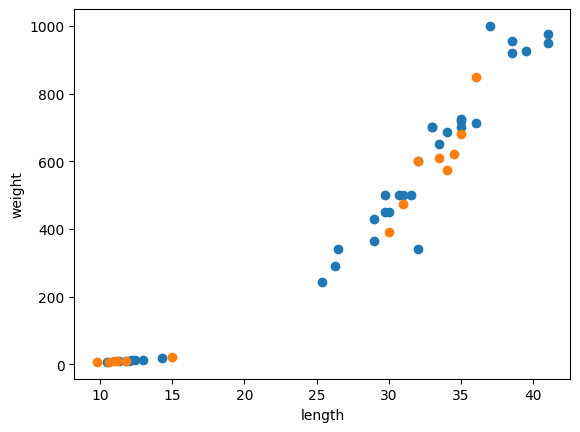

In [17]:
# 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 그려보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램
- fit() 메서드를 실행할 때마다 KNeightborsClassifier 클래스 객체는 이전에 학습한 모든 것을 잃어버림
- 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 함

In [18]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [19]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [20]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 테스트 세트에 대한 예측 겨로가가 정답과 일치함
- 결론 : shuffle() 함수를 잘 사용해서 훈련 / 검증 데이터를 잘 만들었다

##### 핵심 패키지와 함수
- numpy
  - seed() : 난수 생성을 위한 정수 초깃값을 지정. 초깃값이 같으면 동일한 난수를 뽑아냄
  - arange() : 일정 간격의 정수 또는 실수 배열을 만들어줌
  - shuffle() : 주어진 배열을 랜덤하게 섞음

# 02-2 데이터 전처리
#### 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거칩니다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배웁니다

## 넘파이로 데이터 준비하기
- 생선 데이터 준비


In [21]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [28]:
# column_stack 전달받은 리스트를 일렬로 세우고 차례로 나란히 연결 (튜플로 리턴)
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [29]:
fish_data = np.column_stack((fish_length, fish_weight))

In [31]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- 타깃 데이터 만들어보자
- 이전 절에서는 [1], [0]을 여러번 곱해서 만들었음
- 넘파이는 np.ones(), np.zeros() 함수로 같은 값을 만들어줌

In [32]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


- np.column_stack() 함수 : 2차원 리스트를 만들어줌
- npconcatenate() 함수 : 1차원 리스트를 만들어 이어붙여줌 

In [33]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [34]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기
- 사이킷런의 train_test_split() 함수 : 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어줌(알아서 섞어줌)
- 나누고 싶은 리스트나 배열을 원하는 만큼 전달
- 이 예제는 np.random.seed()를 사용해 같은 결과를 내도록 함

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

- 이 함수는 기본적으로 25%를 테스트세트로 떼어 냅니다. 잘 나누었는지 넘파이 배열의 shape 속성으로 입력 데이터 크기를 출력해보겠습니다 

In [43]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [44]:
print(train_target.shape, test_target.shape)

(36,) (13,)


- 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해보겠습니다.

In [45]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 원래 두 생선의 비율은 2.5:1, 테스트 세트의 도미와 빙어의 비율은 3.3:1 -> 샘플링 편향이 조금 나타났다
- 이런 문제 해결을 위해서 train_test_split() 함수를 사용 

In [47]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [48]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리
- 애매한 친구를 찾아내자 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [51]:
# 도미가 나올거라 예상한 데이터
print(kn.predict([[25, 150]]))

[0.]


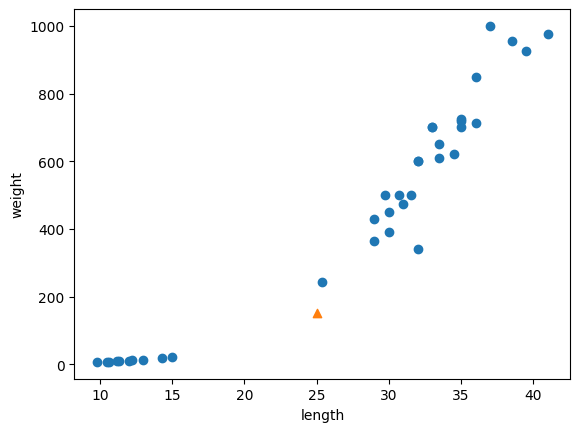

In [52]:
#산점도로 다시보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # 이거모지..?! ,0 ,1
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드 제공
- kneighbors() : 이웃까지의 거리와 이웃 샘플의 인덱스를 반환
- KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환됨

In [53]:
distances, indexes = kn.kneighbors([[25, 150]])

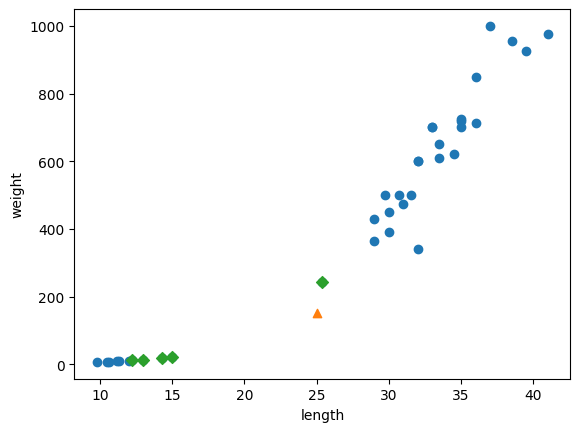

In [54]:
# indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보겠습니다.

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시됨
- 가장 가까운 이웃에 도미가 하나뿐 -> 빙어가 됨
- 데이터로 확인해봐요 

In [55]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [56]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


- 해결의 실마리를 찾기 위해 kneighbors() 메서드에서 반환한 distances 배열을 출력해보겠습니다.

In [57]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라
- 첫 번째 샘플의 거리는 92, 나머지는 130, 138 등등임
- x축은 범위가 좁고(10~40), y축은 범위가 넓습니다 (0~1000) -> y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산됨
- 눈으로 명확히 확인하기 위해 x축 범위를 동일하게 0~1000으로 맞춰보겠습니다
- 맷플롯립에서 x축 범위 지정을 위해 xlim() 함수 사용 

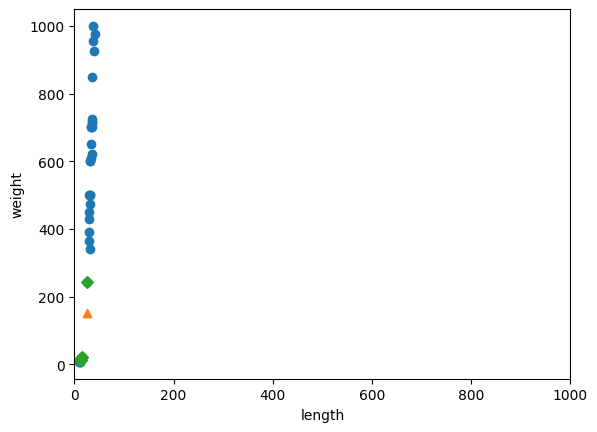

In [60]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 위의 형태는 오로지 생선의 무게(y축)만 고려 대상이 됨
- 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름 -> 이를 두 특성의 스케일이 다르다고 말함
- 데이터를 표현하는 기준이 다르면 알고리즘이 올바로 예측될 수 없음 (특히 거리기반일때!)
- 제대로 사용하기 위해선 특성값을 일정한 기준으로 맞춰 주어야 함 -> 데이터 전처리(data prepocessing)
  - 가장 널리 사용하는 전처리 방법 중 하나는 표준점수(standard score, z 점수)
  - 표준 점수 : 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄 -> 동일한 조건으로 비교 가능
- 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균 내어 구함
- 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
- 표준점수 : 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타냄

In [62]:
# 평균 계산
mean = np.mean(train_input, axis=0) # axis=0 -> 행을 따라 각 열의 통계 값 계산
# 표준편차 계산
std = np.std(train_input, axis=0)

In [63]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [65]:
# train_input의 모든 행에서 mean에 있는 두 평균값을 빼준 후 std에 있는 두 표준편차를 다시 모든 행에 적용
# 이러한 넘파이의 기능을 브로드캐스팅이라고 부름
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기
- 앞서 표준점수로 변환한 train_scaled와 처음 샘플을 다시 산점도로 그려봅니다

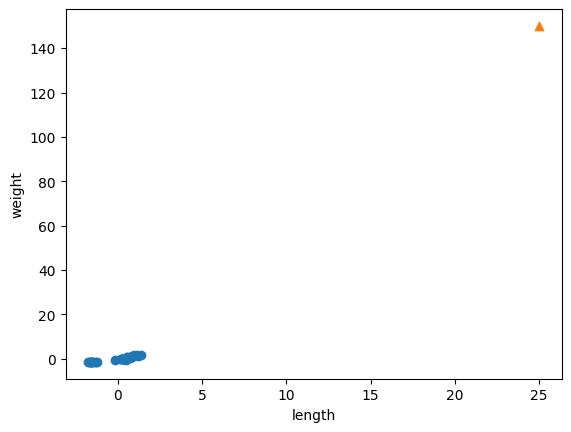

In [67]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플 [25, 150]을 동일한 비율로 변환하지 않아 발생하는 오차

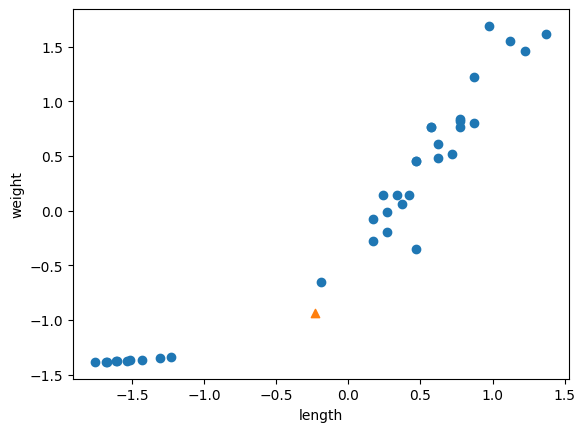

In [69]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축과 y축 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것에 주목
- 이제 이 데이터셋으로 k-최근접 이웃 모델을 다시 훈련해봅시다 

In [70]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

- 마찬가지로 테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 햡니다

In [71]:
# 훈련
test_scaled = (test_input - mean) / std
# 평가
kn.score(test_scaled, test_target)

1.0

- 처음 사용한 샘플 확인 

In [74]:
print(kn.predict([new]))

[1.]


- 드디어 도미를 도미로 예측함
- 마지막으로 kneighbors() 함수로 산점도를 그려보겠습니다

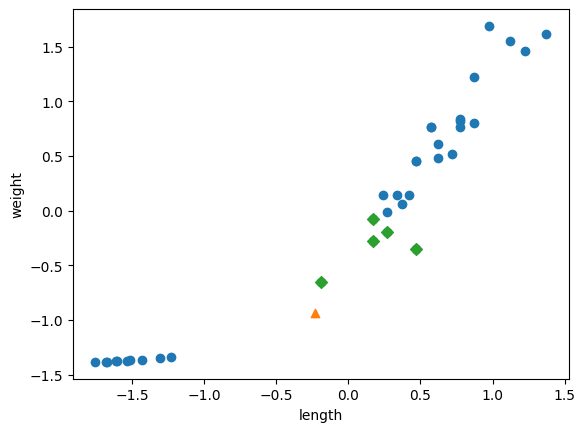

In [76]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 가장 최근 샘플에서 가까운 샘플은 모두 도미인 것으로 확인!
- 대부분 머신러닝 알고리즘은 특성의 스케일이 다르면 잘 작동하지 않음
- 이를 위해 특성을 표준점수로 변환
- 다른 방법도 많지만 가장 많이 사용하는 것은 표준점수